### RC-Tiefpass: Übertragungsfunktion im Real- und Imaginärteil, als Amplitudengang und Phasengang sowie im Bode-Diagramm
Dieses Script verdeutlicht verschiedene Darstellungen der Übertragungsfunktion am Beispiel des RC-Glieds. Außderdem kann im Zeitbereich anhand eines Sinussignals die frequenzabhängige Dämpfung und Phasenverschiebung verfolgt werden.

**Impulsantwort des RC-Glieds:**
$h(t)=\frac{1}{RC}\cdot e^{-\frac{t}{RC}}$

**Übertragungsfunktion:**
$H(\omega)=\frac{1}{1+j \omega RC}$

Im Folgenden wird mit $\tau=RC=\frac{1}{2\pi}$ gerechnet, was einer Grenzfrequenz von $\omega_g = \frac{1}{RC}$ bzw. $f_g=\frac{\omega_g}{2\pi}=1$ Hz entspricht.
#### Darstellung von Real- und Imaginärteil 

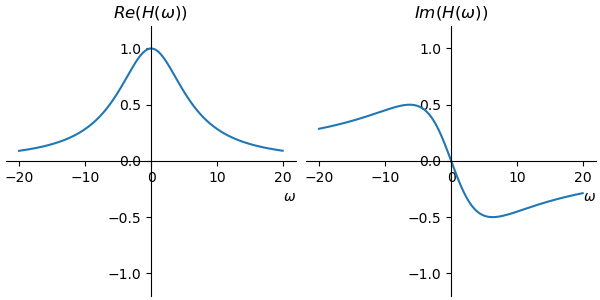

In [1]:
"""
(c) Benno Dömer | HS Pforzheim 2023 

"""
# 'widget' für interaktive Plots
%matplotlib widget 

# Import so, dass möglichst viele Funktionen "wie in Matlab" zur Verfügung stehen:
from numpy import (pi, log10, exp, sqrt, sin, cos, tan, arctan, angle, arange, logspace, linspace, zeros, ones, real, imag) # numpy für's Rechnen, bei Bedarf anpassen
from matplotlib.pyplot import (figure, plot, stem, legend, text, xscale, 
                               grid, xlabel, ylabel, subplot, title, clf, cla, xlim, ylim) # matpotlib für's  Plotten, bei Bedarf anpassen
from matplotlib.pyplot import fill_between as area # Beispiel für eine Mapping auf Matlab-Bezeichnung
import ipywidgets as widgets # interaktive Controls wie Slider, Dropdowns etc.

def myplotstyle(ax): # Hilfsfunktion, hübscht den Plot etwas auf
    ax.spines['right'].set_color('none')
    ax.spines['top'].set_color('none')
    ax.xaxis.set_ticks_position('bottom')
    ax.spines['bottom'].set_position(('data',0))
    ax.yaxis.set_ticks_position('left')
    ax.spines['left'].set_position(('data',0))

figure(figsize=(6, 3), dpi=100, 
       layout='constrained',num='Fig1') # bei Bedarf anpassen, Achtung Tablet: Nicht über 7 Breite; Titel hinter "num", hier Leerzeichen

fg = 1 #Hz, Grenzfrequenz des Filters 
T_RC = 1/2/pi/fg # Zeitkonstante aus fg berechnen

w = arange(-20,20,0.1) # Omega als Vector für den Plot
H=1/(1 + 1j * w * T_RC); # Übertragungsfunktion,  
ax = subplot(1,2,1)
plot(w,real(H))
xlabel('$\omega$', loc='right')
#ylabel('$Re(H(\omega))$', loc='top') 
title('$Re(H(\omega))$')
ylim(-1.2,1.2)
myplotstyle(ax)

ax = subplot(1,2,2)
plot(w,imag(H))
xlabel('$\omega$', loc='right')
#ylabel('$Im(H(\omega))$', loc='top')
title('$Im(H(\omega))$')
ylim(-1.2,1.2)

myplotstyle(ax)



#### Zeitbereich, Betrag und Phase (lineare Darstellung)
**Betrag**:

Allgemein: $|H(\omega)|=\sqrt{\text{Re}(H(j\omega)^2)+\text{Im}(H(j\omega)^2)}$

RC-Glied: $|H(\omega)|=\frac{1}{\sqrt{1+(\omega RC)^2}}$

**Phase**:

Allgemein:

für $\text{Re}(H(j\omega))> 0: \arg(H(\omega))=\text{atan}\frac{\text{Im}(H(\omega))}{\text{Re}(H(\omega))}$

für $\text{Re}(H(j\omega))< 0: \arg(H(\omega))=\text{atan}\frac{\text{Im}(H(\omega))}{\text{Re}(H(\omega))}+\pi$

RC-Glied: 

$\arg(H(\omega))=\text{atan}\frac{-\omega RC}{1}=\text{atan}(-\omega RC)=-\text{atan}(\omega RC)$

Darstellung im Zeitbereich: $u(t)=sin(\omega t)=sin(2\pi f t), y(t)=|H(\omega)|\cdot \sin(\omega t + \arg(H(\omega)))$ mit $f=\frac{\omega}{2\pi}$, hier einstellbar von 0,2 bis 5 Hz:


FloatSlider(value=1.0, description='t/s', max=5.0, min=0.2, step=0.05)

Output()

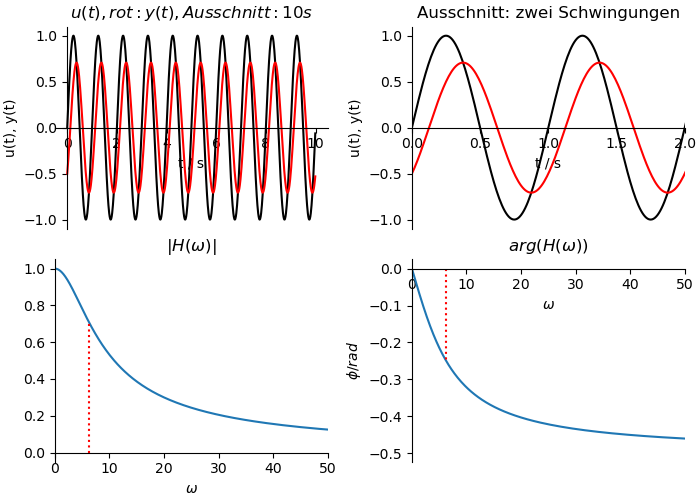

In [2]:
figure(figsize=(7, 5), dpi=100, 
       layout='constrained',num='Fig2') # bei Bedarf anpassen, Achtung Tablet: Nicht über 7 Breite; Titel hinter "num", hier Leerzeichen

# Plotbefehle werden in eine Funktion verpackt, die dann bei Interaktionen aufgerufen wird. Hier ist die Kernfunktionalität
# In Python wird statt mit Klammern oder Schlüsselwörtern wie "end" mit Einrückungen gearbeitet
w = logspace(-1,3,500)#  Frequenzachse mit log-Stützstellendichte, 10^-1...10^3 => 0.1 ... 1000
betrag = 1 / sqrt(1 + (w*T_RC)**2)# Betragsspektrum
phi = arctan( -w*T_RC) # Phase


def plotdata(f):
    figure('Fig2')
    omega = 2 * pi * f
    w0 = 2*pi*f
    t = arange(0,10,0.01); #Matlab: tx=0:0.01:2;
    u = sin(w0*t)
    H0 = abs(1/(1 + 1j * w0 * T_RC))# Abs(H) bei w0
    phi0 = - arctan( w0*T_RC)
    y = H0 * sin(w0*t + phi0);
    ax = subplot(2,2,1)
    cla()
    plot(t,u,'k',t,y,'r')
    ylim(-1.1,1.1)
    xlabel('t / s')
    ylabel('u(t), y(t)')
    #legend('u(t)','y(t)')
    title('$u(t), rot: y(t), Ausschnitt: 10 s$')
    myplotstyle(ax)

    ax = subplot(2,2,2)
    cla()
    plot(t,u,'k',t,y,'r')
    xlim(0, 2/f)
    ylim(-1.1,1.1)
    xlabel('t / s')
    ylabel('u(t), y(t)')
    title('Ausschnitt: zwei Schwingungen')
    myplotstyle(ax)


    #w = logspace(-1,3,500)#  Frequenzachse mit log-Stützstellendichte, 10^-1...10^3 => 0.1 ... 1000
    #betrag = 1 / sqrt(1 + (w*T_RC)**2)# Betragsspektrum
    #phi = arctan( -w*T_RC) # Phase
    ax = subplot(2,2,3)
    cla()
    plot(w,betrag,[w0, w0],[0, H0],':r');
    xlabel('$\omega$')
    #ylabel('$|H(\omega)|$')
    title('$|H(\omega)|$')
    xlim(0,50)
    myplotstyle(ax)

    ax = subplot(2,2,4)
    cla()
    h = plot(w,phi/pi,[w0,w0],[0,phi0/pi],':r'); 
    xlabel('$\omega$'), ylabel('$\phi/rad$'),title('$arg(H(\omega))$')
    xlim(0,50)
    myplotstyle(ax)
   
    
# Interaktion: 
# Definition von Controls: 
fslider  = widgets.FloatSlider(min=0.2, max=5, step=0.05, value=1, continuous_update=True, description='t/s')

#Verknüpfen mit Callback
out = widgets.interactive_output(plotdata, { 'f': fslider}) 
#Anzeigen
display(fslider,out)



#### Einfach logarithmische Darstellung: Nur Frequenzachse ist logarithmisch:


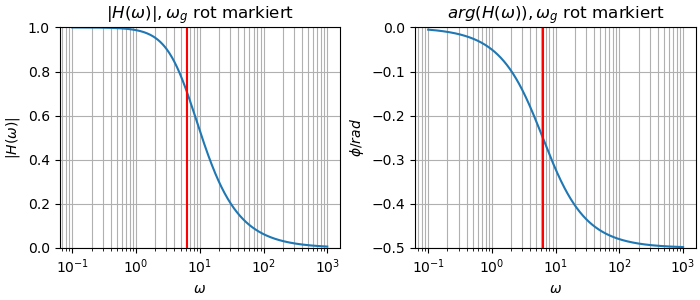

In [3]:
figure(figsize=(7, 3), dpi=100, 
       layout='constrained',num='Fig3') # bei Bedarf anpassen, Achtung Tablet: Nicht über 7 Breite; Titel hinter "num", hier Leerzeichen

ax = subplot(1,2,1)
plot(w,betrag)
grid(visible=True, which='both')

xlabel('$\omega$'), ylabel('$|H(\omega)|$'), title('$|H(\omega)|, \omega_g$ rot markiert')

plot([2*pi*fg,2*pi*fg],[0, 1],'-r')# Linie bei Grenzfrequenz, Betrag ist 1/sqwrt(2), Phase -pi/4
xscale('log')
grid('on)')
ylim(0, 1)

ax = subplot(1,2,2)
plot(w,phi/pi); 

xlabel('$\omega$'), ylabel('$\phi/rad$'),title('$arg(H(\omega)), \omega_g$ rot markiert')
plot([2*pi*fg,2*pi*fg],[0, -0.5],'-r')# Linie bei Grenzfrequenz, Betrag ist 1/sqwrt(2), Phase -pi/4
xscale('log')
ylim(-0.5, 0)
grid(visible=True, which='both')

Die Grenzfrequenz des Filters ist bei $\omega_g= \frac{\omega}{2\pi}$. Einsetzen in Betrag liefert $|H(\omega_g)|=\frac{1}{\sqrt{2}}=\frac{\sqrt{2}}{2}$=0.707...

Verstärkungen bzw. Dämpfungen werden häufig in Dezibel (dB) angegeben. Die Verstärkung bei der Grenzfrequenz beträgt $20\cdot\log_{10}\frac{1}{\sqrt{2}}= -3.01$ dB. Die Phase bei der Grenzfrequenz ist atan(-1)=$-\frac{\pi}{4}$.

#### Doppelt logarithmische Darstellung / Bode-Diagramm
Die Darstellung im sogenannten Bode-Diagramm erfolgt üblicherweise mit Frequenz $f=\frac{\omega}{2\pi}$ statt Kreisfrequenz $\omega$. Der Phasenwinkel wird Grad statt Bogenmaß bzw. rad angegeben. Die Y-Achse wird in dB angegeben, mit $|H(f)|_{dB}=20\cdot \log_{10}(|H(f)|)$. 

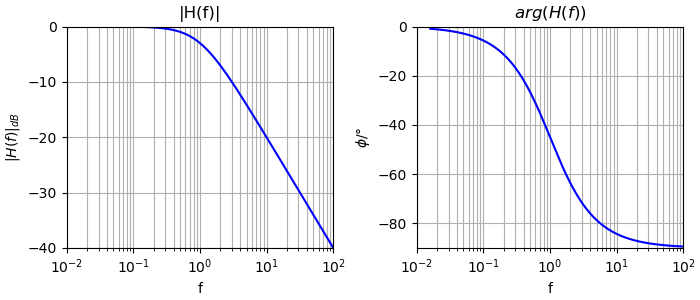

In [4]:
figure(figsize=(7, 3), dpi=100, 
       layout='constrained',num='Fig4') # bei Bedarf anpassen, Achtung Tablet: Nicht über 7 Breite; Titel hinter "num", hier Leerzeichen

ax = subplot(1,2,1)
plot(w/2/pi,20*log10(betrag),lw=1.5,c='b'); 
#set(gca,'XScale','log','Xgrid','on','ygrid','on','FontSize',11,'MinorGridLineStyle','-'); 
xlabel('f'), ylabel('$|H(f)|_{dB}$'), title('|H(f)|')
xlim([0.01,100])
ylim(-40,0)
xscale('log')
grid(visible=True, which='both')

#myplotstyle(ax)

ax = subplot(1,2,2)
plot(w/2/pi,phi/pi*180,lw=1.5,c='b'); 
#yticks([-90 -45 0])
#set(gca,'XScale','log','Xgrid','on','ygrid','on','FontSize',11,'MinorGridLineStyle','-'); 
xlabel('f'), ylabel('$\phi/°$'),title('$arg(H(f))$')
xlim([0.01,100])
ylim(-90,0)
xscale('log')
grid(visible=True, which='both')
#myplotstyle(ax)
